In [1]:
# Functions for graphing collected data

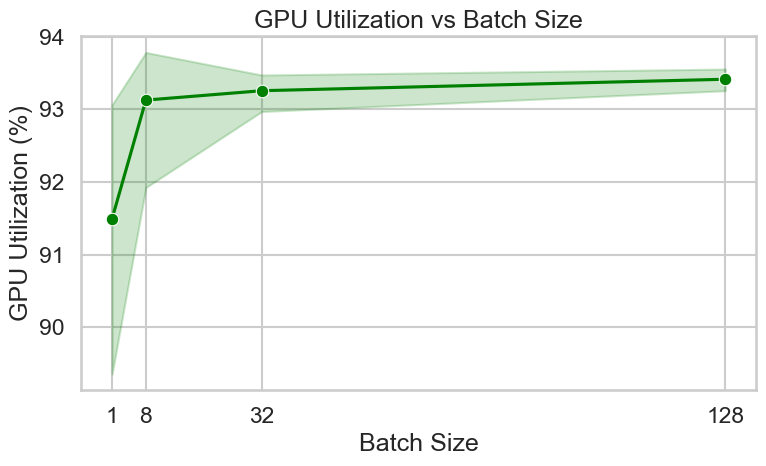

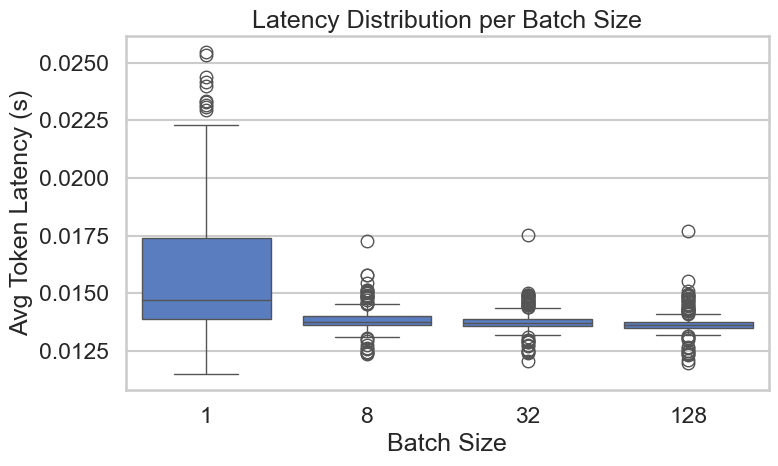

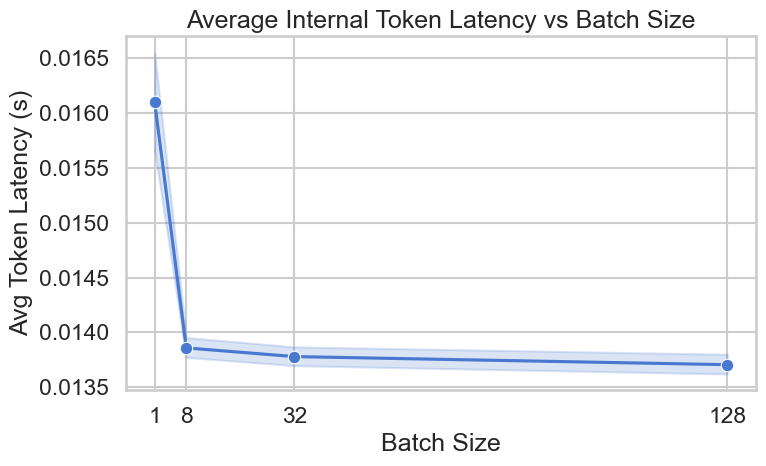

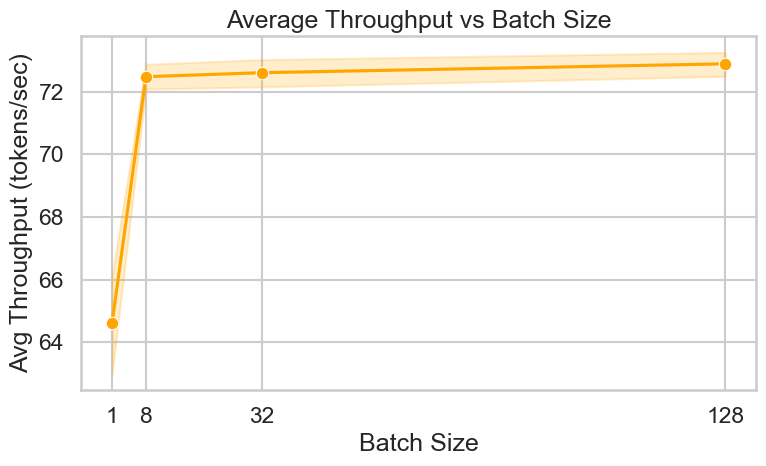

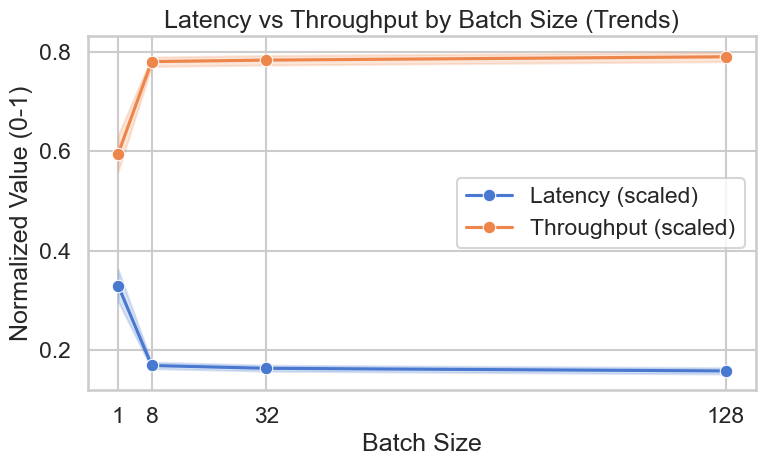

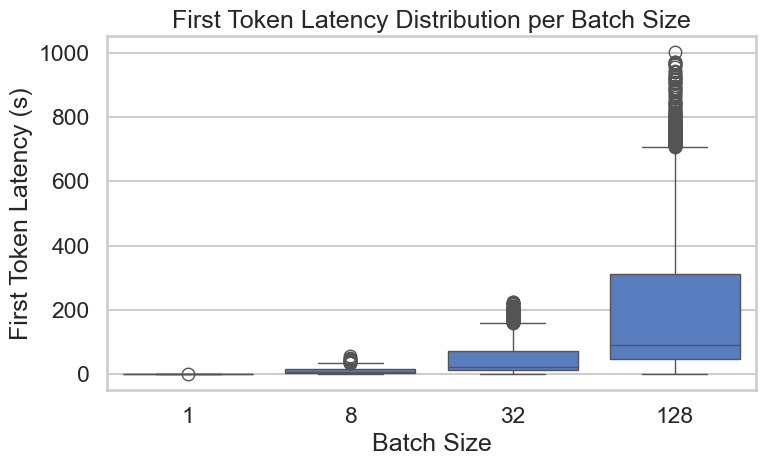

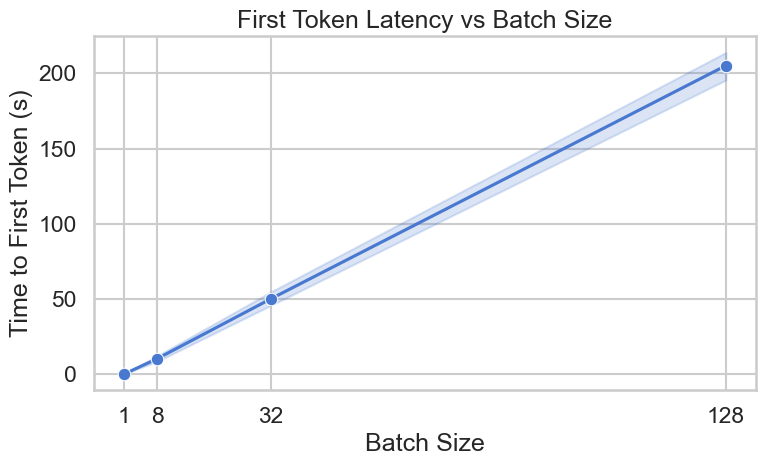

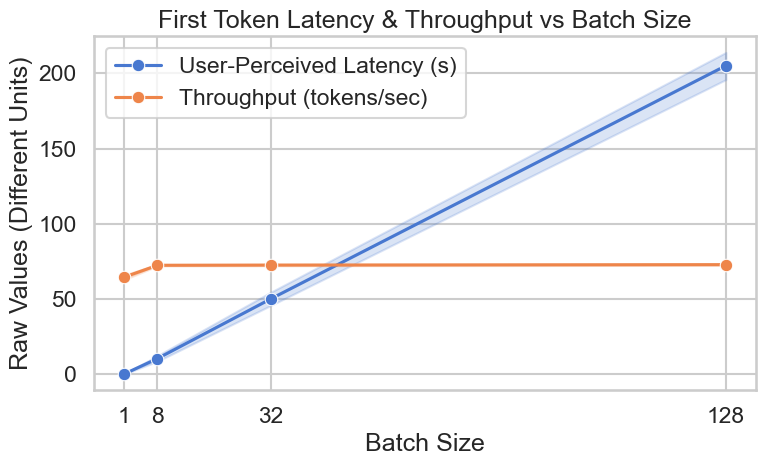

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("results/3060_final_results_cleaned.csv")
df2 = pd.read_csv("results/3060_corrected_latency.csv")
sns.set(style="whitegrid", palette="muted", context="talk")

# Define batch sizes (for ordering in plots)
batch_order = [1, 8, 32, 128]


# GPU Utilization vs Batch Size
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='batch_size', y='gpu_util_percent', marker='o', color='green', sort=False)
plt.xticks(batch_order)
plt.title("GPU Utilization vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("GPU Utilization (%)")
plt.tight_layout()
plt.show()

# Latency Distribution (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='batch_size', y='avg_token_latency', order=batch_order)
plt.title("Latency Distribution per Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Avg Token Latency (s)")
plt.tight_layout()
plt.show()

# Avg Per-Token Latency vs Batch Size
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='batch_size', y='avg_token_latency', marker='o', sort=False)
plt.xticks(batch_order)
plt.title("Average Internal Token Latency vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Avg Token Latency (s)")
plt.tight_layout()
plt.show()

# Avg Throughput vs Batch Size
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='batch_size', y='avg_throughput', marker='o', color='orange', sort=False)
plt.xticks(batch_order)
plt.title("Average Throughput vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Avg Throughput (tokens/sec)")
plt.tight_layout()
plt.show()

# Latency & Throughput on Same Plot (Scaled)
df_scaled = df.copy()
df_scaled['latency_scaled'] = (df['avg_token_latency'] - df['avg_token_latency'].min()) / (df['avg_token_latency'].max() - df['avg_token_latency'].min())
df_scaled['throughput_scaled'] = (df['avg_throughput'] - df['avg_throughput'].min()) / (df['avg_throughput'].max() - df['avg_throughput'].min())

plt.figure(figsize=(8,5))
sns.lineplot(data=df_scaled, x='batch_size', y='latency_scaled', marker='o', label='Latency (scaled)')
sns.lineplot(data=df_scaled, x='batch_size', y='throughput_scaled', marker='o', label='Throughput (scaled)')
plt.xticks(batch_order)
plt.title("Latency vs Throughput by Batch Size (Trends)")
plt.xlabel("Batch Size")
plt.ylabel("Normalized Value (0-1)")
plt.legend()
plt.tight_layout()
plt.show()


# Sample ~25 rows per batch size
sampled_list = []
for batch in df3['batch_size'].unique():
    group = df3[df3['batch_size'] == batch]
    sample_size = min(len(group), batch * 20)  # don't exceed available rows
    sampled_group = group.sample(n=sample_size, random_state=42)
    sampled_list.append(sampled_group)

sampled_df = pd.concat(sampled_list).reset_index(drop=True)

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(
    data=sampled_df, 
    x='batch_size', 
    y='time_to_first_token_user_est', 
    order=batch_order,
    showfliers=True
)
plt.title("First Token Latency Distribution per Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("First Token Latency (s)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(
    data=sampled_df,
    x='batch_size',
    y='time_to_first_token_user_est',
    marker='o',
    sort=False
)
plt.title("First Token Latency vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Time to First Token (s)")
plt.xticks(batch_order)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Latency & Throughput vs Batch Size on same plot
plt.figure(figsize=(8,5))
sns.lineplot(
    data=sampled_df,
    x='batch_size',
    y='time_to_first_token_user_est',
    marker='o',
    label='User-Perceived Latency (s)'
)
sns.lineplot(
    data=df,  # throughput still comes from original df
    x='batch_size',
    y='avg_throughput',
    marker='o',
    label='Throughput (tokens/sec)'
)
plt.xticks(batch_order)
plt.title("First Token Latency & Throughput vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Raw Values (Different Units)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

